In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import scipy.io as sio
import os
import numpy as np

# prepare data into libsvm format

In [61]:
label_path = '../bev/'
labels_mat = sio.loadmat(os.path.join(label_path,'demo.mat'))
print labels_mat.keys()

['demo', '__version__', '__header__', '__globals__']


In [62]:
class_labels = [0,1]
feature_names = []

In [63]:
print labels_mat['demo'].shape
print str(labels_mat['demo'][2,0][0])
print labels_mat['demo'][3,2].shape
print labels_mat['demo'][2,2].size
ids_tmp = labels_mat['demo'][1:,0]
labels_tmp = labels_mat['demo'][1:,2]
print ids_tmp.size, labels_tmp.size
print labels_tmp[1].size, ids_tmp[1]

(441, 4)
20071016_02
(1, 1)
0
440 440
0 [u'20071016_02']


## read person id and its label

In [64]:
labels_dict = {}
num_positive = 0
num_negative = 0
for i in range(ids_tmp.size):
    # label of this person is not provided
    if labels_tmp[i].size == 0:
        continue
    label_tmp = 0 if int(labels_tmp[i]) == 2 else 1
    if label_tmp == 0:
        num_negative += 1
    else:
        num_positive += 1
    labels_dict[str(ids[i][0])] = label_tmp
print("Total:{}, Male:{}, Female:{}".format(num_negative+num_positive, num_positive, num_negative))    

Total:418, Male:179, Female:239


## Read the features

In [67]:
feature_path = '../4_MRI2atlas_AAL_thr_2hao/'
features = []
labels = []
for key in labels_dict:
    if os.path.isfile(os.path.join(feature_path, key+'.mat')):
        # Load feature mat file
        key_mat = sio.loadmat(os.path.join(feature_path, key+'.mat'))
        n,n = key_mat['Wauc'].shape
        # indices for upper matrix items without the diagonal items         
        upper_item_idx = np.triu_indices(n,1)
#         features.append(np.triu(key_mat['Wauc']).flatten().tolist())
        features.append(key_mat['Wauc'][upper_item_idx].tolist())
        labels.append(labels_dict[key])
    else:
        print key, ' is not in ', feature_path
print("n:{}, d:{}".format(len(features), len(features[0])))
        

20080908_04  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081113_14  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081128_11  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20080917_02  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081119_12  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081107_08  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081210_13  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081203_11  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081118_04  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081110_09  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081114_08  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081210_07  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081126_02  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20080613_05  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20080613_06  is not in  ../4_MRI2atlas_AAL_thr_2hao/
20081127_12  is not in  ../4_MRI2atlas_AAL_thr_2hao/
n:402, d:6670


In [87]:
def print_top_features(clf, top_k=10):
    """Prints features with the highest coefficient values, per class"""
#     feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        print clf.coef_
        top_features_idx = np.argsort(clf.coef_[i])[-top_k:]
        if feature_names == []:
            print("{}:{}".format(class_label, top_features_idx))
        else:
            print("%s: %s" % (class_label,
                  " ".join(feature_names[j] for j in top_features_idx)))

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [85]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [90]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, features, labels, cv=5)
#     if hasattr(clf, 'coef_'):
    print("{}, {}/{}".format(name, np.mean(scores), np.std(scores)))
#     if name not in ["Nearest Neighbors",  "Linear SVM", "RBF SVM","Gaussian Process", "Neural Net"]:
#         print_top_features(clf)

Nearest Neighbors, 0.532316768245/0.0445678716444
Linear SVM, 0.582103844351/0.00281046506521
RBF SVM, 0.606950304735/0.0125466680636
Gaussian Process, 0.582103844351/0.00281046506521
Decision Tree, 0.59732223785/0.0589088561825
Random Forest, 0.601794421003/0.0286115542912
Neural Net, 0.649143225504/0.0167230277741
AdaBoost, 0.684366307236/0.0301981663765
Naive Bayes, 0.604136974527/0.0674858539193
QDA, 0.485092983279/0.0398616030277


In [92]:
print 'feature max: ', np.max(features), ' min: ', np.min(features)

feature max:  0.292096591372  min:  0.0


In [118]:
def plot_important_features(features, clf, num_selected_features=50):
    importances = adaboost_clf.feature_importances_
    X = np.array(features)
    std = np.std([tree.feature_importances_ for tree in adaboost_clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(0,num_selected_features):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(num_selected_features), importances[indices[:num_selected_features]],
           color="r", yerr=std[indices[:num_selected_features]], align="center")
    plt.xticks(range(num_selected_features), indices[:num_selected_features])
    plt.xlim([-1, num_selected_features])
    plt.show()

Feature ranking:
1. feature 5810 (0.040000)
2. feature 6179 (0.040000)
3. feature 4820 (0.040000)
4. feature 1354 (0.020000)
5. feature 4887 (0.020000)
6. feature 6406 (0.020000)
7. feature 5781 (0.020000)
8. feature 1027 (0.020000)
9. feature 202 (0.020000)
10. feature 6265 (0.020000)
11. feature 4065 (0.020000)
12. feature 985 (0.020000)
13. feature 6470 (0.020000)
14. feature 4825 (0.020000)
15. feature 5667 (0.020000)
16. feature 663 (0.020000)
17. feature 3160 (0.020000)
18. feature 1620 (0.020000)
19. feature 5784 (0.020000)
20. feature 2044 (0.020000)
21. feature 4007 (0.020000)
22. feature 786 (0.020000)
23. feature 6098 (0.020000)
24. feature 1507 (0.020000)
25. feature 4220 (0.020000)
26. feature 1505 (0.020000)
27. feature 73 (0.020000)
28. feature 5744 (0.020000)
29. feature 5743 (0.020000)
30. feature 4292 (0.020000)
31. feature 6295 (0.020000)
32. feature 6655 (0.020000)
33. feature 1265 (0.020000)
34. feature 971 (0.020000)
35. feature 1653 (0.020000)
36. feature 732 (0.

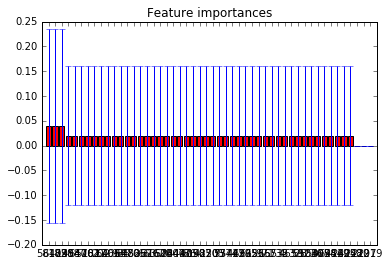

In [119]:

adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(features, labels)
plot_important_features(features, adaboost_clf, 50)

## scale the feature and evaluate the performance of each classifier

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# iterate over classifiers
for name, clf in zip(names, classifiers):
    scores = cross_val_score((make_pipeline(StandardScaler(), clf)), features, labels, cv=5)
    print("{}, {}/{}".format(name, np.mean(scores), np.std(scores)))
#     if name not in ["Nearest Neighbors"]:
#         print_top_features(clf)

Nearest Neighbors, 0.586948741991/0.0169708066764
Linear SVM, 0.58213548992/0.0346908824189
RBF SVM, 0.582103844351/0.00281046506521
Gaussian Process, 0.582103844351/0.00281046506521
Decision Tree, 0.646704172527/0.0509359367612
Random Forest, 0.60435693077/0.0267749086117
Neural Net, 0.577072198781/0.0392704760787
AdaBoost, 0.726621737772/0.0302420426926
Naive Bayes, 0.569883184873/0.0238937468921
QDA, 0.492748085638/0.0346958687746


Feature ranking:
1. feature 5810 (0.040000)
2. feature 6179 (0.040000)
3. feature 4820 (0.040000)
4. feature 1354 (0.020000)
5. feature 4887 (0.020000)
6. feature 6406 (0.020000)
7. feature 5781 (0.020000)
8. feature 1027 (0.020000)
9. feature 202 (0.020000)
10. feature 6265 (0.020000)
11. feature 4065 (0.020000)
12. feature 985 (0.020000)
13. feature 6470 (0.020000)
14. feature 4825 (0.020000)
15. feature 5667 (0.020000)
16. feature 663 (0.020000)
17. feature 3160 (0.020000)
18. feature 1620 (0.020000)
19. feature 5784 (0.020000)
20. feature 2044 (0.020000)
21. feature 4007 (0.020000)
22. feature 786 (0.020000)
23. feature 6098 (0.020000)
24. feature 1507 (0.020000)
25. feature 4220 (0.020000)
26. feature 1505 (0.020000)
27. feature 73 (0.020000)
28. feature 5744 (0.020000)
29. feature 5743 (0.020000)
30. feature 4292 (0.020000)
31. feature 6295 (0.020000)
32. feature 6655 (0.020000)
33. feature 1265 (0.020000)
34. feature 971 (0.020000)
35. feature 1653 (0.020000)
36. feature 732 (0.

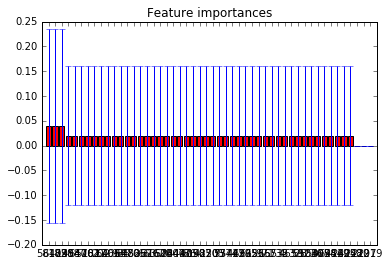

In [120]:
scaled_adaboost_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())
scaled_adaboost_clf.fit(features, labels)
plot_important_features(features, scaled_adaboost_clf)